In [2]:
# Setting up imports, options, and functions to be used later
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental  import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


ohe = OneHotEncoder(handle_unknown='ignore')
categorical_processing = Pipeline(steps=[('ohe', ohe)])
preprocessing = ColumnTransformer(transformers=[('categorical', categorical_processing, ['conditions'])],
                                  remainder='passthrough')
pd.set_option('display.min_rows', 25)

In [3]:
# Reading and visualizing training data to kick off data exploration

initial_training = pd.read_csv(r'C:\Users\luisp\Downloads\ml-challenge-2023-30412\train.csv')
initial_training

,id,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
0,10461,60000,True,Buono stato / Abitabile,1980.0,41.901300,12.700000,175.00,30.0,2.0,NaN,1.0,NaN,3.0,1.0,1.00000,35.0
1,51304,900000,NaN,Buono stato / Abitabile,NaN,41.907017,12.481311,NaN,NaN,3.0,NaN,1.0,1.0,NaN,3.0,1.00000,131.0
2,33032,33000,NaN,Buono stato / Abitabile,1960.0,41.976500,12.440500,204.20,30.0,4.0,NaN,1.0,NaN,4.0,1.0,1.00000,16.0
3,62281,166000,NaN,Ottimo / Ristrutturato,NaN,45.484800,12.198200,175.00,NaN,1.0,True,1.0,NaN,1.0,2.0,0.99205,100.0
4,45681,410000,True,Buono stato / Abitabile,NaN,45.424480,12.328622,65.91,NaN,3.0,NaN,2.0,1.0,NaN,3.0,1.00000,90.0
5,59924,89000,NaN,Buono stato / Abitabile,NaN,41.874581,12.541382,NaN,NaN,-1.0,NaN,1.0,NaN,NaN,2.0,1.00000,30.0
6,36856,632000,True,Buono stato / Abitabile,NaN,41.864600,12.500900,202.39,NaN,2.0,NaN,3.0,1.0,5.0,4.0,1.00000,NaN
7,47960,147000,True,Buono stato / Abitabile,1960.0,45.501742,12.254337,NaN,150.0,-1.0,NaN,1.0,1.0,NaN,5.0,1.00000,107.0
8,7326,275000,True,Ottimo / Ristrutturato,1950.0,41.896900,12.519100,175.00,60.0,6.0,NaN,1.0,1.0,7.0,3.0,1.00000,75.0
9,44039,459000,True,Ottimo / Ristrutturato,1995.0,41.906400,12.420300,175.00,100.0,0.0,True,3.0,NaN,2.0,5.0,1.00000,130.0


In [4]:
# After getting an initial feel of the dataset, let's get some summary statistics
initial_training.describe()

,id,price,construction_year,latitude,longitude,energy_efficiency,expenses,floor,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
count,46312.000000,4.631200e+04,32366.000000,46299.000000,46299.000000,2.640900e+04,30158.000000,44281.000000,43896.000000,28869.000000,27963.000000,45959.000000,46299.000000,45869.000000
mean,32960.756132,5.031879e+05,1958.032874,43.534743,11.451295,5.091382e+03,195.285132,2.033333,1.559140,0.952510,5.724207,3.284166,0.994756,114.866620
std,19090.178152,1.106504e+06,72.021035,1.789416,1.502453,7.600521e+05,4035.008418,2.175668,0.769869,0.212689,191.115233,1.329654,0.030093,88.650549
min,0.000000,1.540000e+02,1000.000000,41.690300,9.060775,1.000000e-02,0.000000,-5.000000,1.000000,0.000000,1.000000,1.000000,0.588014,0.000000
25%,16466.500000,1.990000e+05,1950.000000,41.882400,9.221300,1.590000e+02,40.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,68.000000
50%,32906.500000,3.150000e+05,1967.000000,41.960604,12.361864,1.750000e+02,80.000000,2.000000,1.000000,1.000000,4.000000,3.000000,1.000000,91.000000
75%,49489.250000,5.150000e+05,1987.000000,45.465800,12.487604,1.750000e+02,150.000000,3.000000,2.000000,1.000000,6.000000,4.000000,1.000000,130.000000
max,66159.000000,7.200000e+07,2500.000000,45.561298,12.854100,1.234570e+08,346000.000000,56.000000,9.000000,1.000000,31960.000000,9.000000,1.000000,990.000000


In [5]:
# It contains quite a few outliers and a good range of values with different magnitudes
# This already gives us some clues of what clening up and transforming the data will look like
# Let's see how much missing data we have 
initial_training.isna().sum()

id                         0
price                      0
balcony                15443
conditions              1229
construction_year      13946
latitude                  13
longitude                 13
energy_efficiency      19903
expenses               16154
floor                   2031
garden                 31529
n_bathrooms             2416
elevator               17443
total_floors           18349
n_rooms                  353
proximity_to_center       13
surface                  443
dtype: int64

In [7]:
# Garden having over half of the values missing is concerning and must be kept in mind
# The rest of the columns while not perfect don't seem to be too bad
# Thankfully we're not missing any of the prices and very few of the locations (lat, lon)
# Let's check if there are any exact duplicates
initial_training.duplicated().sum()


0

In [10]:
# Since price is our target variable, I want to get a good feel of what it looks like from the start
initial_training.sort_values("price")

,id,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
4488,39430,154,True,Nuovo / Nuova costruzione,2019.0,41.853586,12.652271,NaN,NaN,NaN,True,2.0,NaN,NaN,5.0,1.000000,119.0
15605,46741,650,NaN,Buono stato / Abitabile,NaN,45.476200,12.197400,NaN,0.0,3.0,NaN,1.0,NaN,3.0,4.0,1.000000,80.0
7132,62599,1000,NaN,Ottimo / Ristrutturato,NaN,45.482689,12.250937,NaN,NaN,2.0,True,3.0,NaN,NaN,5.0,1.000000,190.0
1123,60369,1000,True,Ottimo / Ristrutturato,NaN,41.735241,12.259580,180.00,100.0,1.0,NaN,1.0,1.0,NaN,3.0,0.793269,60.0
8799,9279,1000,NaN,NaN,NaN,41.924900,12.489800,175.00,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.000000,150.0
35572,65324,1000,NaN,Ottimo / Ristrutturato,NaN,45.483269,12.252280,111.00,NaN,0.0,True,3.0,NaN,2.0,4.0,1.000000,190.0
25883,19015,1100,NaN,Ottimo / Ristrutturato,1960.0,45.470700,9.236800,118.27,100.0,0.0,NaN,1.0,1.0,6.0,2.0,1.000000,60.0
10757,39790,3900,NaN,Buono stato / Abitabile,NaN,45.433700,12.338300,NaN,29.0,1.0,NaN,1.0,NaN,2.0,1.0,1.000000,40.0
30519,15179,4000,NaN,NaN,NaN,45.462800,9.110040,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1.0,1.000000,NaN
24062,51110,4500,NaN,Ottimo / Ristrutturato,2010.0,41.850500,12.438100,3.51,4.0,1.0,NaN,NaN,NaN,1.0,NaN,1.000000,NaN


In [12]:
# This is very useful, let's start by the first few results
# The 154 price initially didn't seem impossible (remember the famous 1€ sicillian homes)
# However, taking a closer look, it is. Being in the outskirts of Rome and supposedly new. This is clearly wrong
# At the opposite end looking up the most expensive "house" it's easy to see it is the Colosseum
# This is the first row that will clearly be removed later
# Looking at the other values though, there are other concerns. 13368 and 15100 have exactly the same coordinates 
# but they have conflicting data. This arouses suspicions of other potential coordinate duplicates. Let's check
initial_training[initial_training.duplicated(["latitude", "longitude"])].sort_values("latitude")

,id,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
8267,18071,219000,True,Ottimo / Ristrutturato,1980.0,41.716900,12.310100,175.00,40.0,1.0,True,1.0,1.0,6.0,3.0,0.834287,75.0
46220,22198,96960,NaN,Buono stato / Abitabile,NaN,41.720993,12.502324,NaN,NaN,NaN,NaN,1.0,NaN,NaN,4.0,1.000000,70.0
17830,47861,87000,NaN,Buono stato / Abitabile,NaN,41.720993,12.502324,NaN,NaN,-1.0,NaN,1.0,NaN,NaN,3.0,1.000000,100.0
26268,33811,121200,True,Buono stato / Abitabile,NaN,41.720993,12.502324,NaN,NaN,1.0,NaN,1.0,NaN,NaN,4.0,1.000000,214.0
32139,31727,149000,True,Ottimo / Ristrutturato,NaN,41.722300,12.522400,175.00,0.0,1.0,NaN,2.0,NaN,1.0,3.0,1.000000,70.0
43088,48195,790000,True,Ottimo / Ristrutturato,NaN,41.722700,12.501000,22.24,0.0,0.0,True,NaN,NaN,3.0,5.0,1.000000,410.0
19819,61344,229000,True,Ottimo / Ristrutturato,2007.0,41.723200,12.517000,175.00,50.0,0.0,True,2.0,NaN,1.0,4.0,1.000000,150.0
27487,8424,65000,True,Da ristrutturare,1980.0,41.723200,12.521900,175.00,0.0,0.0,NaN,1.0,NaN,2.0,2.0,1.000000,65.0
31998,13610,639000,True,Buono stato / Abitabile,1980.0,41.723900,12.357000,175.00,0.0,0.0,True,2.0,NaN,1.0,3.0,0.941552,135.0
41053,64304,9000,NaN,Buono stato / Abitabile,NaN,41.723900,12.357000,175.00,NaN,1.0,NaN,NaN,NaN,1.0,1.0,0.941552,12.0


In [13]:
# There are a lot and it's easy to see a lot of them have conflicting data
# Since we dont'want to train our model on duplicate and conflicting data, we will drop them right away
# To keep the quality of our data as high as possible I will choose the row with the least missing values to be kept
# Of course, this is a heuristic
# Removing these duplicates is probably the biggest edit we'll make so I'll rename this subset training and clean it as we go
training = initial_training.assign(counts=initial_training.count(axis=1)).sort_values("counts").drop_duplicates(["latitude", "longitude"], keep="last").drop("counts", axis=1)

In [14]:
training.describe()

,id,price,construction_year,latitude,longitude,energy_efficiency,expenses,floor,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
count,36384.000000,3.638400e+04,25899.000000,36383.000000,36383.000000,2.017100e+04,24540.000000,34743.000000,34576.000000,22786.000000,20966.000000,36122.000000,36383.000000,36302.000000
mean,32936.378710,5.117961e+05,1956.289200,43.578733,11.443213,6.622047e+03,203.380929,2.002590,1.568487,0.946897,4.526519,3.318227,0.994482,116.318330
std,19064.823318,1.128026e+06,70.083325,1.792802,1.503294,8.696716e+05,4070.573225,2.163565,0.790175,0.224243,2.647533,1.353425,0.030882,90.244651
min,0.000000,6.500000e+02,1000.000000,41.690300,9.060775,1.000000e-02,0.000000,-5.000000,1.000000,0.000000,1.000000,1.000000,0.588014,0.000000
25%,16436.750000,1.990000e+05,1950.000000,41.882899,9.220600,1.630000e+02,40.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,70.000000
50%,32862.000000,3.150000e+05,1965.000000,41.973560,12.356800,1.750000e+02,80.000000,2.000000,1.000000,1.000000,4.000000,3.000000,1.000000,93.000000
75%,49389.250000,5.200000e+05,1980.000000,45.467329,12.486200,1.750000e+02,150.000000,3.000000,2.000000,1.000000,6.000000,4.000000,1.000000,130.000000
max,66159.000000,7.200000e+07,2500.000000,45.561298,12.854100,1.234570e+08,346000.000000,56.000000,9.000000,1.000000,135.000000,9.000000,1.000000,990.000000


In [15]:
# There are some homes that have a surface of 0, let's see how many
zero_surface = training[training["surface"] == 0]
zero_surface

,id,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
34101,39141,9900000,NaN,Buono stato / Abitabile,NaN,41.908457,12.478962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.0
2400,61397,8000000,NaN,Buono stato / Abitabile,NaN,41.833338,12.417839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.0
37498,57367,1900000,NaN,Buono stato / Abitabile,NaN,45.438084,12.318196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.0
32284,27873,8900000,NaN,Da ristrutturare,NaN,41.924177,12.521186,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.000000,0.0
43367,9672,10000000,NaN,NaN,NaN,45.506401,9.099400,NaN,NaN,6.0,NaN,NaN,NaN,1.0,NaN,0.912844,0.0
18286,56220,16000000,NaN,Ottimo / Ristrutturato,NaN,45.480541,9.211150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.000000,0.0
35275,1307,8000000,NaN,Ottimo / Ristrutturato,NaN,45.437698,12.336030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.000000,0.0
4119,9755,18000000,NaN,NaN,NaN,45.463699,9.192800,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,1.000000,0.0
26693,4445,450000,NaN,Ottimo / Ristrutturato,NaN,45.474796,12.233891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.000000,0.0
20408,37603,15000000,NaN,Da ristrutturare,NaN,41.898500,12.490300,NaN,0.0,NaN,NaN,NaN,NaN,NaN,5.0,1.000000,0.0


In [16]:
zero_surface.describe()

,id,price,construction_year,latitude,longitude,energy_efficiency,expenses,floor,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
count,89.000000,8.900000e+01,25.000000,89.000000,89.000000,45.000000,19.000000,67.000000,30.000000,7.0,42.000000,78.000000,89.000000,89.0
mean,32857.314607,6.662257e+06,1942.600000,43.148747,11.759720,1192.541778,389.526316,2.656716,4.633333,1.0,2.928571,4.294872,0.997671,0.0
std,19493.917700,9.679703e+06,68.317275,1.706857,1.352082,6939.507016,1099.927188,2.402979,2.552664,0.0,2.157153,1.859402,0.015646,0.0
min,567.000000,9.990000e+04,1700.000000,41.728300,9.099400,1.000000,0.000000,-1.000000,1.000000,1.0,1.000000,1.000000,0.879877,0.0
25%,12364.000000,1.600000e+06,1935.000000,41.900500,12.318196,175.000000,0.000000,0.000000,3.000000,1.0,1.000000,4.000000,1.000000,0.0
50%,35756.000000,3.650000e+06,1960.000000,41.965900,12.417839,175.000000,0.000000,3.000000,4.000000,1.0,2.500000,5.000000,1.000000,0.0
75%,50732.000000,8.200000e+06,1970.000000,45.443144,12.490300,175.000000,0.000000,4.000000,7.000000,1.0,4.000000,5.000000,1.000000,0.0
max,62697.000000,7.200000e+07,2020.000000,45.525690,12.697700,46708.000000,3500.000000,12.000000,9.000000,1.0,12.000000,9.000000,1.000000,0.0


In [19]:
# We have two options: imputation and removal
# Imputation when done right can be great, however it is hard to get right and since the subset is small I think it'll be better
# to just remove these rows. Besides that, surface is very highly correlated to price, it is an important column to get right
# Additionally, the mean and median of the subset is an order of magnitude higher, so a simple imputation would likely be inaccurate
# It is also worth noting that this gets rid of the colosseum which is one less pain to take care of
training = training.drop(training[training["surface"] == 0].index)

In [20]:
# Let's see what the construction year situation looks like 
training.sort_values("construction_year", ascending=False)

,id,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
30496,6258,145000,NaN,Buono stato / Abitabile,2500.0,45.497383,12.253994,NaN,200.0,1.0,NaN,1.0,NaN,NaN,6.0,1.0,98.0
17999,35368,520000,True,Nuovo / Nuova costruzione,2025.0,45.428000,9.202100,3.51,100.0,-1.0,True,1.0,1.0,7.0,3.0,1.0,163.0
7168,4432,226200,True,Nuovo / Nuova costruzione,2025.0,45.505755,9.244630,NaN,NaN,2.0,True,1.0,1.0,NaN,2.0,1.0,58.0
10606,6332,730000,True,Nuovo / Nuova costruzione,2025.0,45.510800,9.233700,3.51,NaN,4.0,True,3.0,1.0,4.0,4.0,1.0,181.0
27655,24183,440700,True,Nuovo / Nuova costruzione,2025.0,45.505800,9.244600,175.00,0.0,2.0,True,2.0,1.0,5.0,3.0,1.0,113.0
2539,18213,274300,True,Nuovo / Nuova costruzione,2024.0,45.492776,9.209316,NaN,NaN,2.0,NaN,1.0,1.0,NaN,2.0,1.0,55.0
14394,7724,266000,True,Nuovo / Nuova costruzione,2024.0,45.464005,9.240772,NaN,1.0,1.0,True,1.0,1.0,NaN,2.0,1.0,66.0
12029,32105,250000,True,Nuovo / Nuova costruzione,2024.0,45.504200,9.127100,3.51,NaN,1.0,True,1.0,1.0,6.0,2.0,1.0,66.0
32693,42567,740000,True,Nuovo / Nuova costruzione,2024.0,45.457200,9.222000,3.51,NaN,3.0,True,2.0,1.0,7.0,3.0,1.0,115.0
940,35608,443000,True,Nuovo / Nuova costruzione,2024.0,45.427825,9.202072,NaN,100.0,1.0,True,2.0,1.0,NaN,4.0,1.0,160.0


In [21]:
# There are a lot of futuristic homes with construction years greater than 2023
# We could explotre this data further, however, construction year should be highly correlated to conditions
# Additionally, it's likely safe to assume that conditions impact a house price's more than the construction year
# Due to this, and the fact that conditions has less missing data, I think it's okay to go with the 
# Minimum Description Length principle and drop the construction column of our training data
# If we wanted to keep the column it is worth noting that precisely because of the correlation to conditions
# a stratified imputation would probably work pretty well

training = training.drop(["construction_year"], axis=1)

<AxesSubplot:xlabel='energy_efficiency', ylabel='price'>

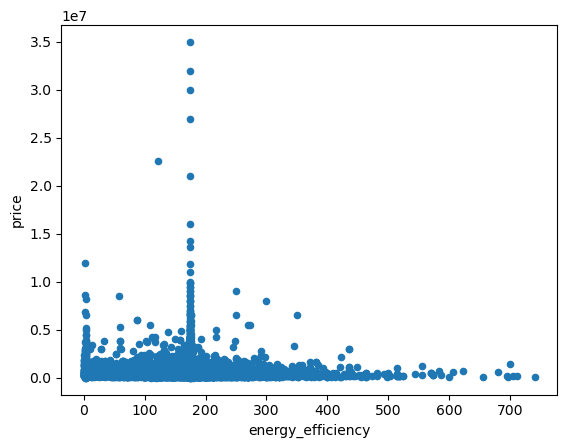

In [32]:
# Onto our next feature that I want to explore: energy_efficiency 
# Let's visualize the variable with a scatter plot
training[training["energy_efficiency"] < 800][["price", "energy_efficiency"]].plot(kind="scatter", x="energy_efficiency", y="price")

In [36]:
# There are a lot of extremely low values for energy efficiency. A quick google search reveals there's two metrics for it
# It seems as though the majority are reported on the old kWh/m2a unit but there's quite a few that seem to be reported on
# the new EP index value, considering that this is a metric whose adoption should increase overtime, it's likely better to 
# disregard energy efficiency for now as it might lead to a lot of incoveniences later
training[training["energy_efficiency"] < 5].sort_values("energy_efficiency")

,id,price,balcony,conditions,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
14052,22450,190000,True,Da ristrutturare,41.840200,12.549500,0.01,67.0,2.0,NaN,1.0,NaN,3.0,2.0,1.0,65.0
31982,13397,615000,True,Ottimo / Ristrutturato,41.839000,12.556800,0.01,NaN,0.0,True,3.0,1.0,3.0,4.0,1.0,180.0
35263,52075,495000,True,Buono stato / Abitabile,45.433164,12.319764,0.01,NaN,1.0,NaN,2.0,0.0,NaN,7.0,1.0,150.0
41221,48840,640000,True,Nuovo / Nuova costruzione,42.019600,12.470700,0.01,NaN,0.0,True,NaN,NaN,3.0,5.0,1.0,387.0
14915,7006,1430000,NaN,Buono stato / Abitabile,41.985700,12.421800,0.10,700.0,0.0,True,NaN,1.0,3.0,5.0,1.0,650.0
12117,27796,1850000,NaN,Buono stato / Abitabile,41.991100,12.440500,0.10,0.0,0.0,NaN,NaN,NaN,1.0,5.0,1.0,800.0
34066,46056,1490000,True,Ottimo / Ristrutturato,41.927700,12.476500,0.10,250.0,4.0,NaN,NaN,1.0,5.0,5.0,1.0,275.0
44416,63447,530000,NaN,Da ristrutturare,41.903600,12.506300,0.10,NaN,3.0,NaN,2.0,1.0,6.0,5.0,1.0,180.0
2330,16008,1210000,True,Buono stato / Abitabile,41.927500,12.524000,0.10,1.0,3.0,NaN,NaN,NaN,4.0,5.0,1.0,289.0
21828,18186,2400000,True,Ottimo / Ristrutturato,41.924000,12.479200,0.10,700.0,3.0,NaN,NaN,1.0,5.0,5.0,1.0,345.0


In [37]:
training = training.drop(["energy_efficiency"], axis=1)

In [38]:
# Let's look at the other column that concerned us: garden
# Garden has over 2/3rds of its values missing which is cause for concern, let's see what it's values looks like
training["garden"].unique()

array([nan, True], dtype=object)

In [39]:
# Since this is a boolean variable, it is very attractive to assume that, at least for a sizeable proportion of houses,
# NaN indicates the absence of a garden. For now, however, I want to make as little assumptions as possible
# As such I'll drop the column for now and come back to it later to see if this assumption increases our performance
training = training.drop(["garden"], axis=1)

In [44]:
# There are very few values with latitude and longitude missing, since this is a very important field let's see what they look like
training[training["latitude"].isna()]

,id,price,balcony,conditions,latitude,longitude,expenses,floor,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
35023,60531,250000,True,Buono stato / Abitabile,NaN,NaN,100.0,6.0,1.0,1.0,NaN,3.0,NaN,90.0


In [46]:
# Since it's only one value it's probably safe to remove it
training = training.drop(training[training["latitude"].isna()].index)

In [49]:
# Let's look again at our missing values
training.isna().sum()

id                         0
price                      0
balcony                11814
conditions               836
latitude                   0
longitude                  0
expenses               11774
floor                   1619
n_bathrooms             1749
elevator               13516
total_floors           15370
n_rooms                  251
proximity_to_center        0
surface                   82
dtype: int64